In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
# About dataset' columns

Age: The insured person's age.

Sex: Gender (male or female) of the insured.

BMI (Body Mass Index): A measure of body fat based on height and weight.

Children: The number of dependents covered.

Smoker: Whether the insured is a smoker (yes or no).

Region: The geographic area of coverage.

Charges: The medical insurance costs incurred by the insured person.

SyntaxError: invalid syntax (726590042.py, line 3)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


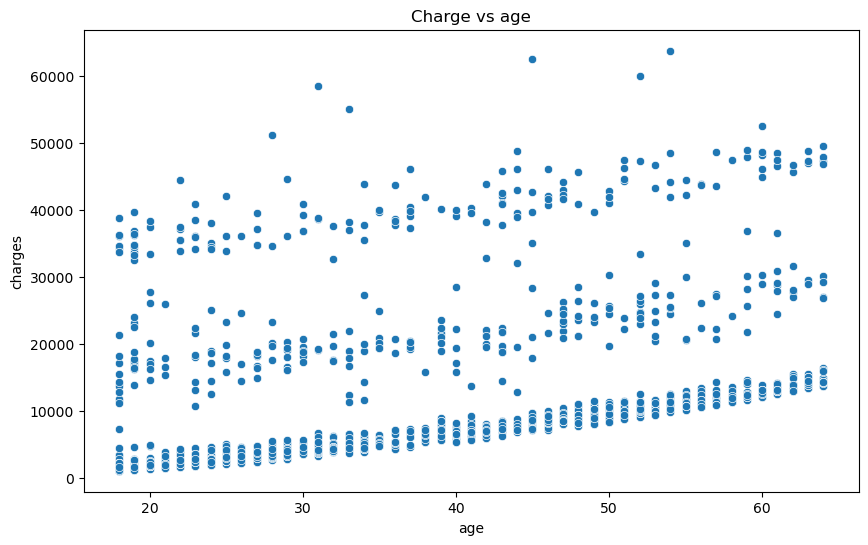

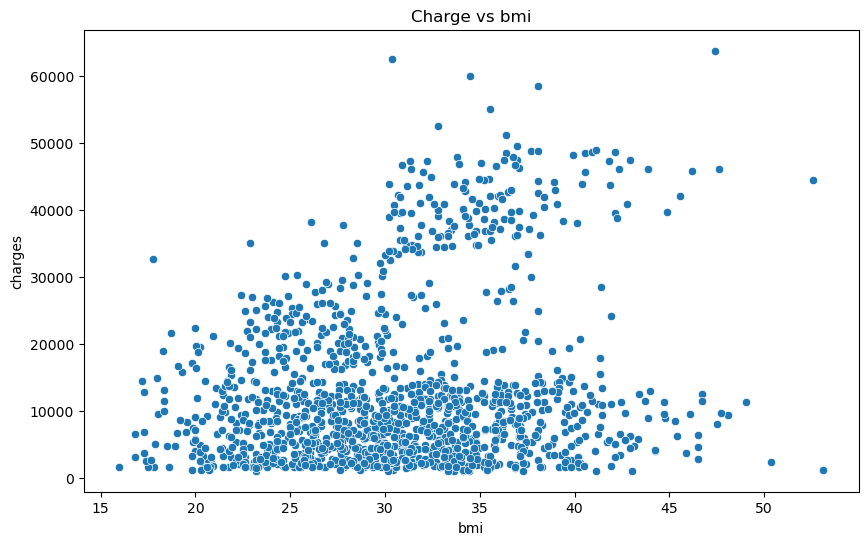

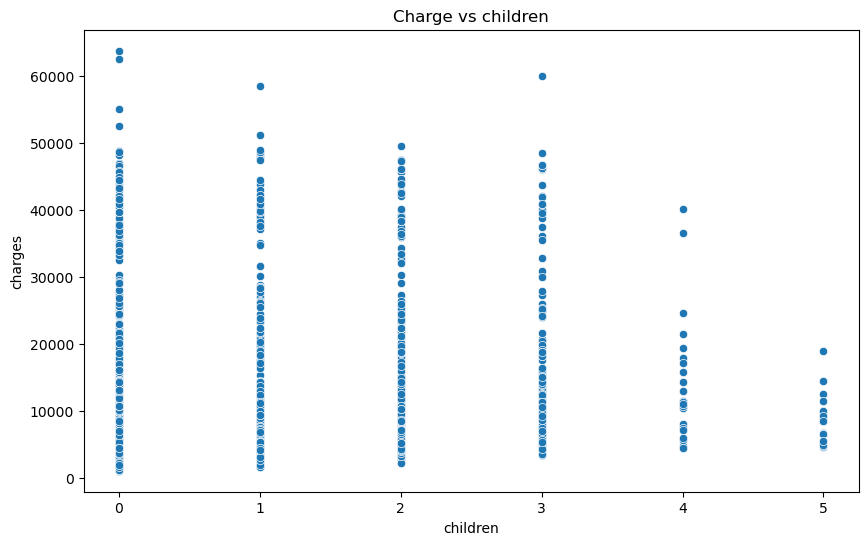

In [37]:
numerical_columns = df[['age','bmi','children','charges']]

for col in numerical_columns:
    if col != 'charges':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[col], y=df['charges'])
        plt.title(f'Charge vs {col}')
        plt.show()

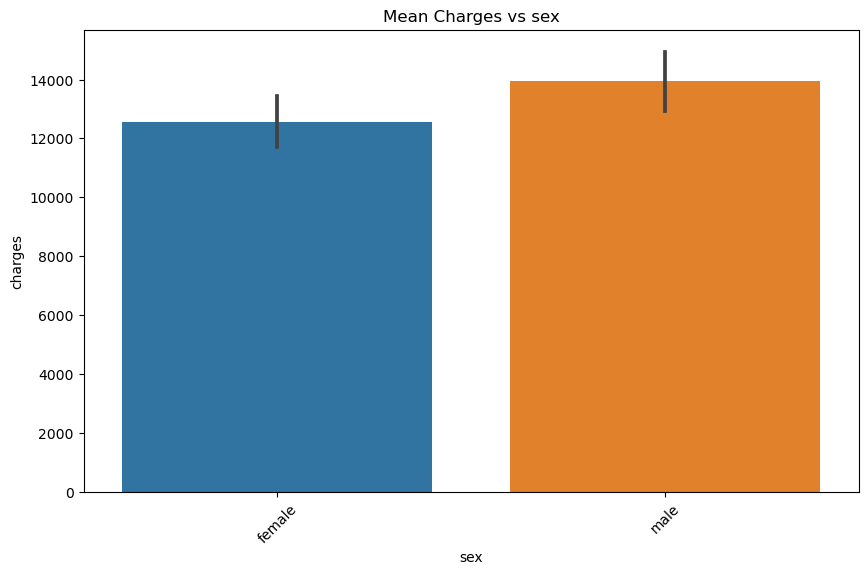

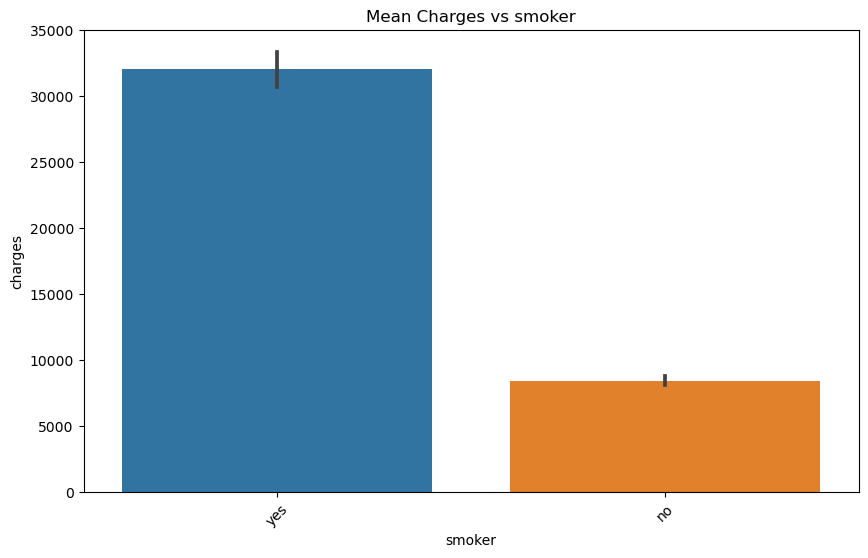

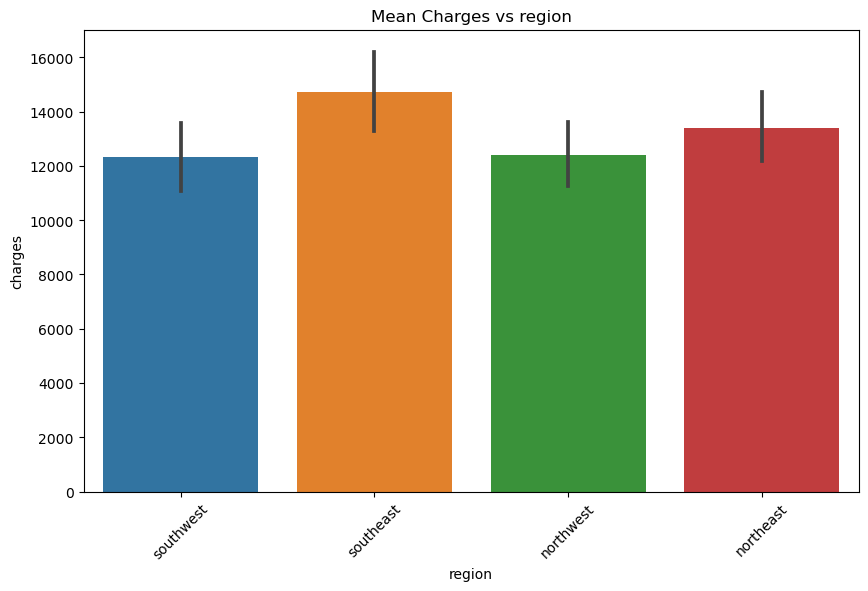

In [38]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df[col], y=df['charges'], estimator='mean')
    plt.title(f'Mean Charges vs {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
df['smoker']= df['smoker'].apply(lambda x: 1 if 'yes' in x else 0)

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])
print(df['region'].unique())

[3 2 1 0]


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [28]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [44]:
df['sex'] = df['sex'].apply(lambda x : 0 if 'female' in x else 1)

In [45]:
df['sex'].unique()
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [46]:
X = df[['age', 'bmi', 'children','smoker', 'region']]
y = df['charges'] 
print(X.shape, y.shape)

(1338, 5) (1338,)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import numpy as npdf.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [72]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [82]:
def remove_outliers(data, column_name):
    # IQR
    Q1 = np.percentile(data[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(data[column_name], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    print("Old Shape: ", data.shape)

    # Upper bound
    upper = np.where(data[column_name] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(data[column_name] <= (Q1-1.5*IQR))

    # Remove outliers
    data.drop(upper[0], inplace = True)
    data.drop(lower[0], inplace = True)

    data.reset_index(drop=True, inplace = True)
    print("New Shape: ", data.shape)
    return data

In [83]:
df = remove_outliers(df, 'bmi')
df = remove_outliers(df, 'charges')

Old Shape:  (1191, 7)
New Shape:  (1184, 7)
Old Shape:  (1184, 7)
New Shape:  (1131, 7)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9680\3049653492.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df = remove_outliers(df, 'bmi')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9680\3049653492.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df = remove_outliers(df, 'charges')


C:\Users\LENOVO\anaconda3\envs\python_ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


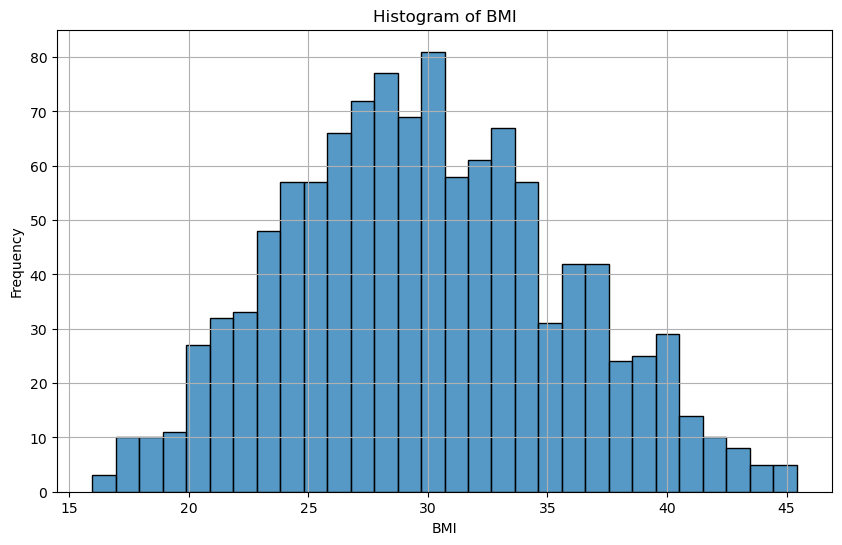

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=False)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\LENOVO\anaconda3\envs\python_ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


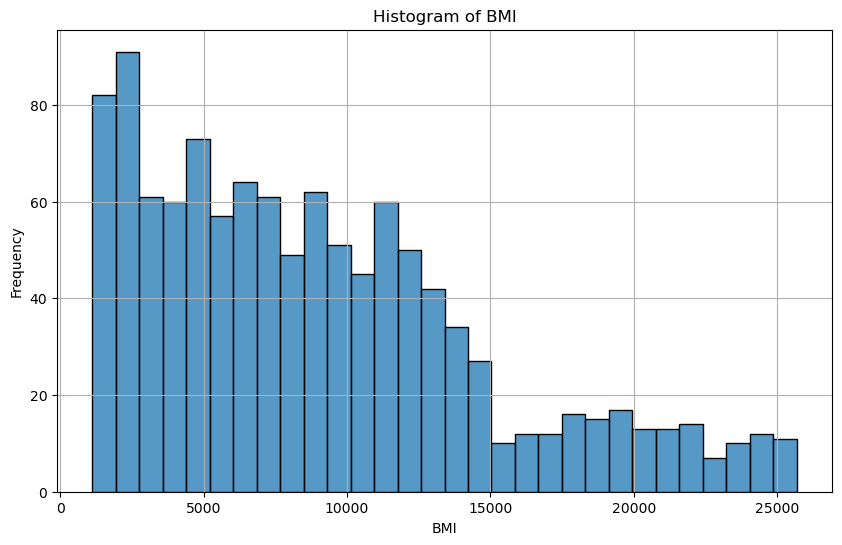

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=False)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\LENOVO\anaconda3\envs\python_ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


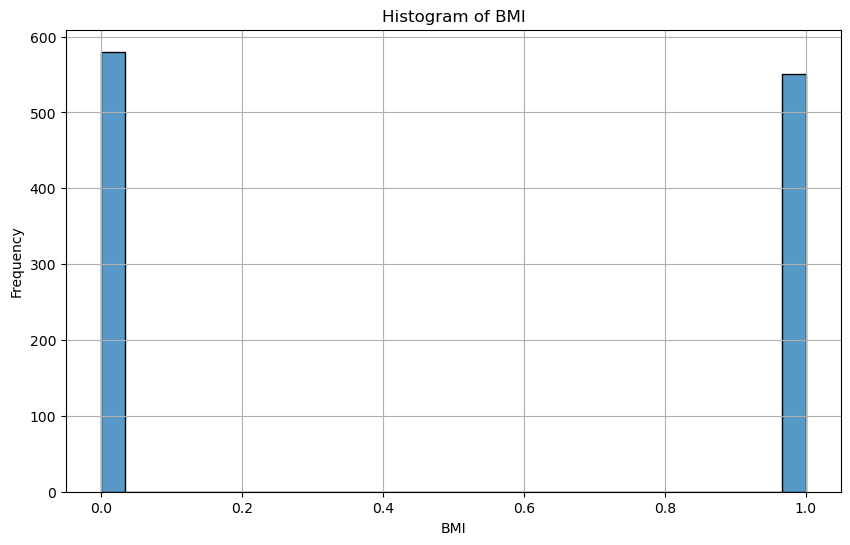

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sex'], bins=30, kde=False)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\LENOVO\anaconda3\envs\python_ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


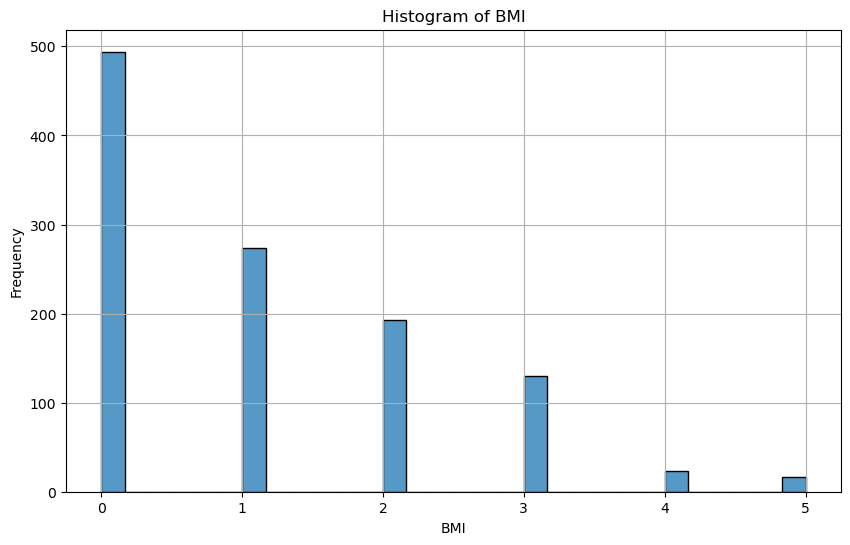

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['children'], bins=30, kde=False)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

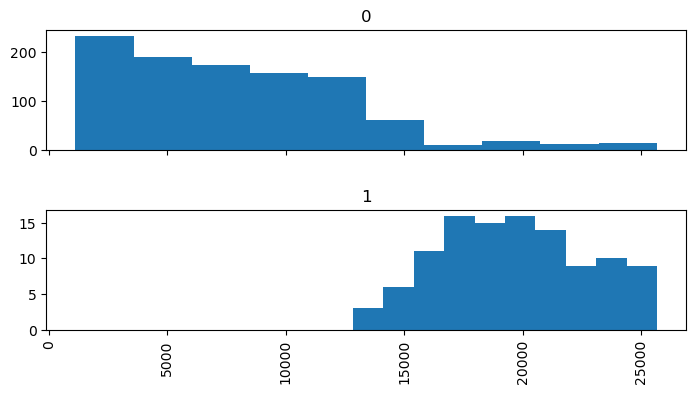

In [92]:
df.hist(column='charges', by='smoker', figsize=(8,4), layout=(2,1), sharex=True)
plt.show()

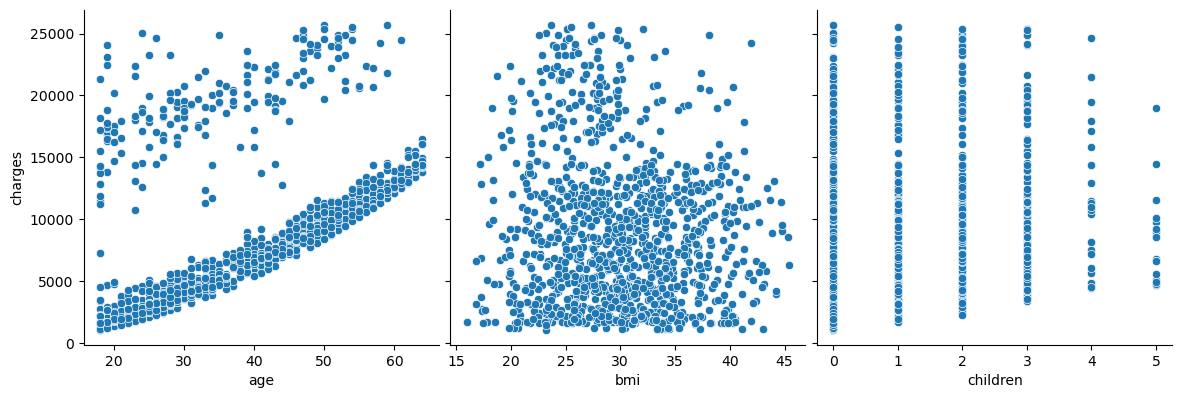

In [95]:
sns.pairplot(
    df,
    x_vars=['age', 'bmi', 'children'],
    y_vars=['charges'],
    height=4
)

plt.show()

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

X = df.drop(columns=['smoker','age'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")




Mean Absolute Error: 9.826148705278001e-13
Mean Squared Error: 2.2635870341862727e-24


In [97]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
model = SVR(kernel='linear')  # Choose the kernel type based on your data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.003847154350853426
R-squared: 0.9999999998939559
